In [1]:
import cv2
import numpy as np
import rasterio
import matplotlib.pyplot as plt

In [5]:
def crop_image(image_path, output_cropped_image_path):
    # Lecture de l'image
    with rasterio.open(image_path) as src:
        image = src.read(1)
    
    # Normalisation de l'image pour OpenCV
    image_normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    
    # Détection des contours avec OpenCV
    _, thresholded = cv2.threshold(image_normalized, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Trouver le contour le plus grand
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Découpe de l'image
    cropped_image = image[y:y+h, x:x+w]
    
    # Affichage de l'image découpée
    plt.imshow(cropped_image, cmap='RdYlGn')
    plt.colorbar()
    plt.title('IMAGE découpée')
    plt.show()
    
    # Sauvegarde de l'image découpée
    with rasterio.open(
        output_cropped_image_path, 
        'w', 
        driver='GTiff', 
        height=cropped_image.shape[0],
        width=cropped_image.shape[1],
        count=1,
        dtype='float32',
        crs=src.crs,
        transform=src.transform
    ) as dst:
        dst.write(cropped_image, 1)
    
    print(f"Image découpée sauvegardée dans {output_cropped_image_path}")

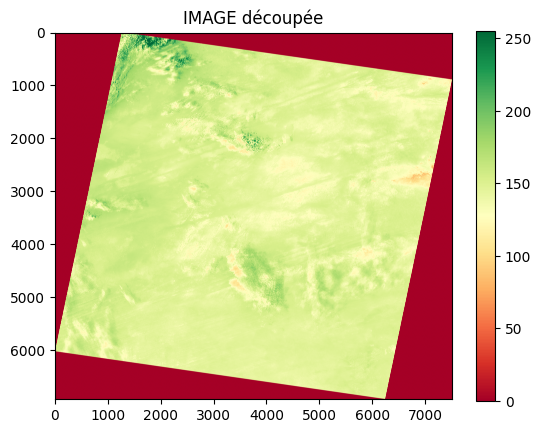

Image découpée sauvegardée dans ../data/cropped_images/LT05_L1TP_196047_19950627_20200912_02_T1_B3_cropped.TIF


In [7]:
# Crop /découpe de l'image B3.TIF
if __name__ == "__main__":
    crop_image('../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B3.TIF', '../data/cropped_images/LT05_L1TP_196047_19950627_20200912_02_T1_B3_cropped.TIF')

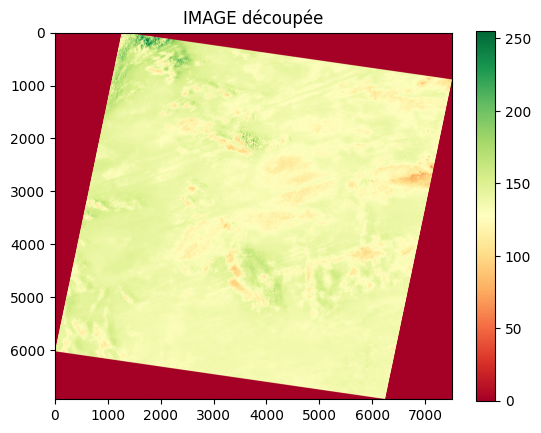

Image découpée sauvegardée dans ../data/cropped_images/LT05_L1TP_196047_19950627_20200912_02_T1_B4_cropped.TIF


In [8]:
# Crop /découpe de l'image B4.TIF
if __name__ == "__main__":
    crop_image('../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B4.TIF', '../data/cropped_images/LT05_L1TP_196047_19950627_20200912_02_T1_B4_cropped.TIF')